# Homework 1

## FINM 25000 - 2025

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

## HBS Case

### *The Harvard Management Company and Inflation-Indexed Bonds*

### Notation
(Hidden LaTeX commands)

$$\newcommand{\mux}{\tilde{\boldsymbol{\mu}}}$$
$$\newcommand{\wtan}{\boldsymbol{\text{w}}^{\text{tan}}}$$
$$\newcommand{\wtarg}{\boldsymbol{\text{w}}^{\text{port}}}$$
$$\newcommand{\mutarg}{\tilde{\boldsymbol{\mu}}^{\text{port}}}$$
$$\newcommand{\wEW}{\boldsymbol{\text{w}}^{\text{EW}}}$$
$$\newcommand{\wRP}{\boldsymbol{\text{w}}^{\text{RP}}}$$
$$\newcommand{\wREG}{\boldsymbol{\text{w}}^{\text{REG}}}$$

***

# 1. HMC's Approach

**Section 1 is not graded**, and you do not need to submit your answers. But you are encouraged to think about them, and we will discuss them.

### 1. 
There are thousands of individual risky assets in which HMC can invest.  Explain why MV optimization across 1,000 securities is infeasible.

### 2.
Rather than optimize across all securities directly, HMC runs a two-stage optimization.
1. They build asset class portfolios with each one optimized over the securities of the specific asset class.  
2. HMC combines the asset-class portfolios into one total optimized portfolio.

In order for the two-stage optimization to be a good approximation of the full MV-optimization on all assets, what must be true of the partition of securities into asset classes?

### 3.
Should TIPS form a new asset class or be grouped into one of the other 11 classes?

### 4. 
Why does HMC focus on real returns when analyzing its portfolio allocation? Is this just a matter of scaling, or does using real returns versus nominal returns potentially change the MV solution?

### 5.
The case discusses the fact that Harvard places bounds on the portfolio allocation rather than implementing whatever numbers come out of the MV optimization problem.

How might we adjust the stated optimization problem in the lecture notes to reflect the extra constraints Harvard is using in their bounded solutions given in Exhibits 5 and 6?

### 6. 
Exhibits 5 shows zero allocation to domestic equities and domestic bonds across the entire computed range of targeted returns, (5.75% to 7.25%). Conceptually, why is the constraint binding in all these cases? What would the unconstrained portfolio want to do with those allocations and why?

### 7.
Exhibit 6 changes the constraints, (tightening them in most cases.) How much deterioration do we see in the mean-variance tradeoff that Harvard achieved?

***

# 2 Mean-Variance Optimization

<i>This section is graded for a good-faith effort by your group. Submit your write-up- along with your supporting code. </i>

### Data
You will need the file in the github repo, `data/multi_asset_etf_data.xlsx`.
- The time-series data gives monthly returns for the 11 asset classes and a short-term Treasury-bill fund return, ("SHV",) which we consider as the risk-free rate.
- The data is provided in total returns, (in which case you should ignore the SHV column,) as well as excess returns, (where SHV has been subtracted from the other columns.)
- These are nominal returns-they are not adjusted for inflation, and in our calculations we are not making any adjustment for inflation.
- The exhibit data that comes via Harvard with the case is unnecessary for our analysis.

### Model
We are going to analyze the problem in terms of **excess** returns.
- Thus, you will focus on the `Excess Returns` section of the lecture notes, especially the formulas on slide 50.
- Be sure to use the`excess returns` tab of the data.

### Format
In the questions below, **annualize the statistics** you report.
- Annualize the mean of monthly returns with a scaling of 12.
- Annualize the volatility of monthly returns with a scaling of $\sqrt{12}$
- The Sharpe Ratio is the mean return divided by the volatility of returns. Accordingly, we can annualize the Sharpe Ratio with a scaling of $\sqrt{12}$
- Note that we are not scaling the raw timeseries data, just the statistics computed from it (mean, vol, Sharpe). 

### Footnotes

#### Data File
* The case does not give time-series data, so this data has been compiled outside of the case, and it intends to represent the main asset classes under consideration via various ETFs. For details on the specific securities/indexes, check the “Info” tab of the data.

#### Risk-free rate
* In the lecture-note we considered a constant risk-free rate. It is okay that our risk-free rate changes over time, but the assumption is that investors know it’s value one-period ahead of time. Thus, at any given point in time, it is a risk-free rate for the next period. (This is often discussed as the "bank account" or "money market account" in other settings.

***

### Answers 

### 1. Summary Statistics
* Calculate and display the mean and volatility of each asset’s excess return. (Recall we use volatility to refer to standard deviation.)
* Which assets have the best and worst Sharpe ratios? Recall that the Sharpe Ratio is simply the ratio of the mean-to-volatility of excess returns:
$$\text{sharpe ratio of investment }i = \frac{\mux_i}{\sigma_i}$$

Be sure to annualize all three statss (mean, vol, Sharpe).
* mean is scaled by `12`
* vol is scaled by `sqrt(12)`
* Sharpe is scaled by `sqrt(12)`

#### _Annualized Mean Excess Returns_

Data labels: ['descriptions', 'prices', 'total returns', 'excess returns']
Index(['Date', 'BWX', 'DBC', 'EEM', 'EFA', 'HYG', 'IEF', 'IYR', 'PSP', 'QAI',
       'SPY', 'TIP'],
      dtype='object')


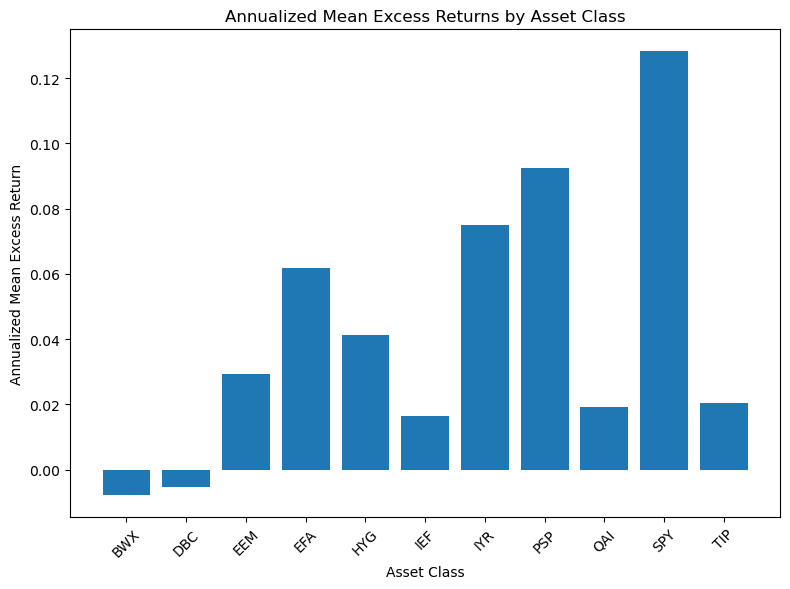

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read data using pandas and print labels for reference. 
data = pd.read_excel('/home/ksrayaldin/FINMATH/hw1data.xlsx', sheet_name=None)
print("Data labels:", list(data.keys()))
# Uncomment this line to see all excess returns.
# print(data['excess returns'])

# Asset classes:
print(data['excess returns'].keys())

# Calculate mean of each asset:
mean_excess_returns_three= dict()
for key in data['excess returns'].keys():
    if key != 'Date':
        mean_excess_returns_three[key] = np.mean(data['excess returns'][key]) * 12

plt.figure(figsize=(8, 6))
plt.bar(mean_excess_returns_three.keys(), mean_excess_returns_three.values())
plt.title('Annualized Mean Excess Returns by Asset Class')
plt.xlabel('Asset Class')
plt.ylabel('Annualized Mean Excess Return')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('annualized_mean_excess_returns.png')
plt.show()

#### _Volatility of Annualized Excess Returns_

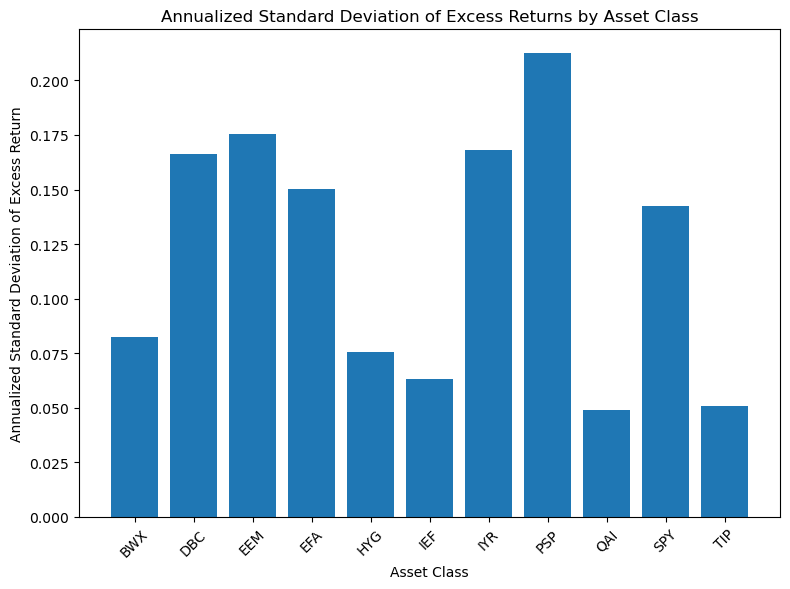

In [87]:
# Calculate standard deviation of each asset (excluding Date column):
std_excess_returns = dict()
for key in data['excess returns'].keys():
    if key != 'Date':
        std_excess_returns[key] = np.std(data['excess returns'][key]) * np.sqrt(12)
plt.figure(figsize=(8, 6))
plt.bar(std_excess_returns.keys(), std_excess_returns.values())
plt.title('Annualized Standard Deviation of Excess Returns by Asset Class')
plt.xlabel('Asset Class')
plt.ylabel('Annualized Standard Deviation of Excess Return')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('annualized_std_excess_returns.png')
plt.show()

#### _Plotting the Mean Excess Returns vs. Standard Deviation_:

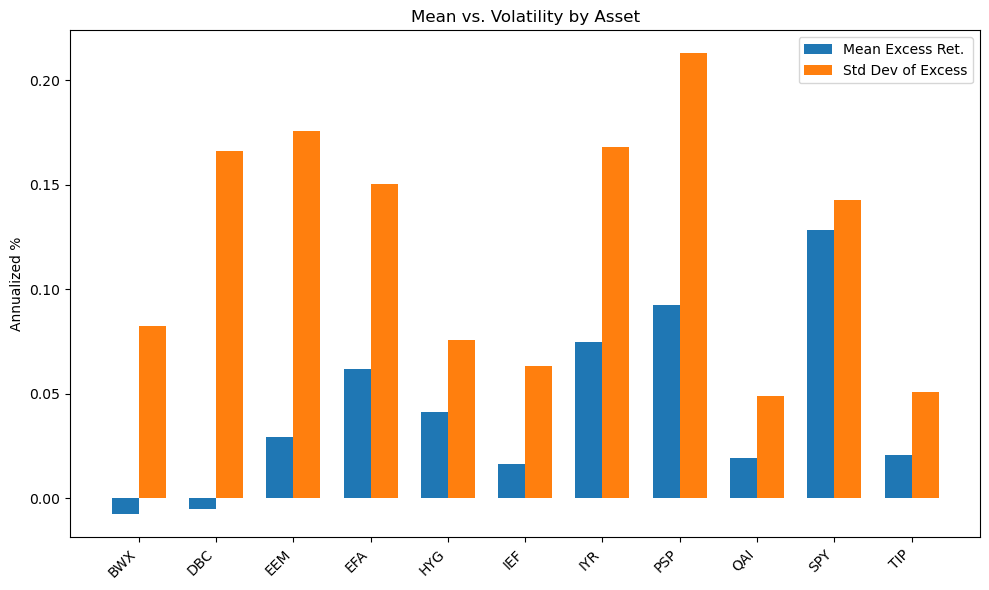

In [88]:
# Plotting the Mean Excess Returns vs. Standard Deviation:
# Add Mean excess returns and Standard Deviation of Excess Returns to a DataFrame to plot them together.
df = pd.DataFrame({
    'Mean': mean_excess_returns_three,
    'Vol':  std_excess_returns
})
# plotting
labels = df.index
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x - width/2, df['Mean'],  width, label='Mean Excess Ret.')
ax.bar(x + width/2, df['Vol'],   width, label='Std Dev of Excess')

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_ylabel('Annualized %')
ax.set_title('Mean vs. Volatility by Asset')
ax.legend()
plt.tight_layout()
plt.show()


#### _Calculating Sharpe ratios_:

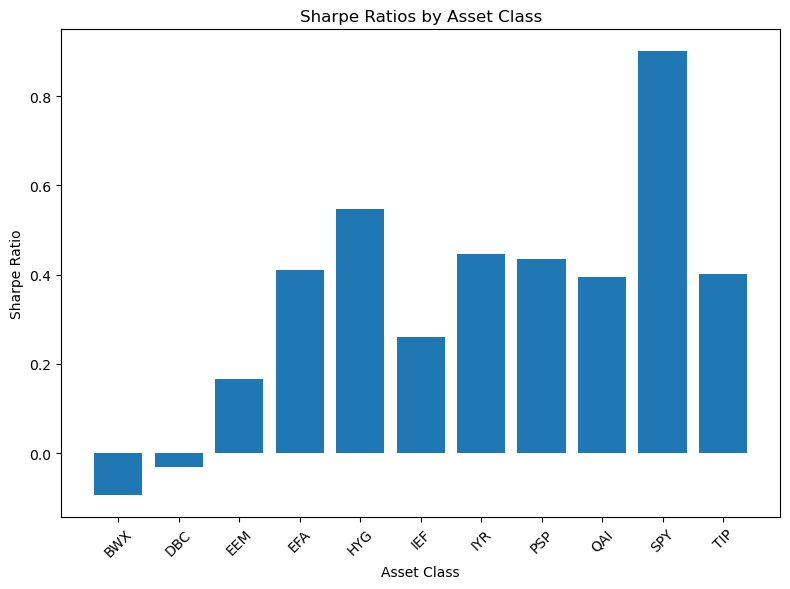

Asset with the best Sharpe Ratio: SPY with a Sharpe Ratio of 0.90
Asset with the worst Sharpe Ratio: BWX with a Sharpe Ratio of -0.09


In [89]:
# Make dictionary of Sharpe Ratios:
sharpe_ratios = dict()
# Calculate Sharpe Ratios for each asset class:
# Note: Sharpe Ratio = Mean Excess Return / Standard Deviation of Excess Return
# Ensure to handle division by zero if std_excess_returns is zero.
for key in mean_excess_returns_three.keys():
    if std_excess_returns[key] != 0:
        sharpe_ratio = mean_excess_returns_three[key] / std_excess_returns[key]
    else:
        sharpe_ratio = np.nan
    sharpe_ratios[key] = sharpe_ratio
# Plotting Sharpe Ratios:
plt.figure(figsize=(8, 6))
plt.bar(sharpe_ratios.keys(), sharpe_ratios.values())
plt.title('Sharpe Ratios by Asset Class')
plt.xlabel('Asset Class')
plt.ylabel('Sharpe Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('sharpe_ratios.png')
plt.show()

# Best Sharpe Ratio:
best_sharpe_asset = max(sharpe_ratios, key=sharpe_ratios.get)
best_sharpe_value = sharpe_ratios[best_sharpe_asset]
print(f"Asset with the best Sharpe Ratio: {best_sharpe_asset} with a Sharpe Ratio of {best_sharpe_value:.2f}")

# Worst Sharpe Ratio:
worst_sharpe_asset = min(sharpe_ratios, key=sharpe_ratios.get)
worst_sharpe_value = sharpe_ratios[worst_sharpe_asset]
print(f"Asset with the worst Sharpe Ratio: {worst_sharpe_asset} with a Sharpe Ratio of {worst_sharpe_value:.2f}")

#### Best and Worst Sharpe Ratio: ####
The asset class SPY (representing the S&P 500) has the best Sharpe ratio of 0.90, whereas the worst Sharpe ratio is displayed by BWX with a rate of -0.09

### 2. Descriptive Analysis
* Calculate the correlation matrix of the returns. Which pair has the highest correlation? And the lowest?
* How well have TIPS done in our sample? Have they outperformed domestic bonds? Foreign bonds?

#### _Correlation Matrix of Excess returns_

In [90]:
# Make a datafram of excess returns that makes the dates into the index of the data structure.
# This is better than .drop() since it makes us to lose the data info. 
excess_returns_pd = data['excess returns'].set_index('Date')

corr_matrix = excess_returns_pd.corr()

# print(f"Correlation Matrix:\n  {corr_matrix}")

# Highest correlation dictionary. Plug in the first data point:
highest_corr = {'init': float('-inf')}
max_val = float('-inf')

# Go through the correlation matrix and find the pairs with the highest correlation and put them in
# the dictionary. We should expect the pairs (asset, asset) representing the correlation between
# an asset with itself as the ones with the highest correlation. I will skip those since they are trivial.
for key in corr_matrix.keys():
    for key1 in corr_matrix[key].keys():
        if key == key1:
            continue # Skip the self correlations
        val =  corr_matrix[key][key1]
        if val > max_val:
            max_val = val
            # Reset dictionary: 
            highest_corr = {f"{key}, {key1}": val}
        elif val == max_val:
            # Found another pair with the same maximum:
            highest_corr[f"{key}, {key1}"] = val
    
# Print highest correlations dictionary:
print("Highest correlation pairs")
print(highest_corr)
print("\n")

# Lowest correlation dictionary:
lowest_corr = {}
min_val = float('inf')

for key in corr_matrix.keys():
    for key1 in corr_matrix[key].keys():
        if key == key1:
            continue # skip the 1.0 self–self correlations
        val = corr_matrix[key][key1]
        if val < min_val:
            # found a new minimum: reset dict
            min_val = val
            lowest_corr = {f"{key}, {key1}": val}
        elif val == min_val:
            # found another pair with the same minimum
            lowest_corr[f"{key}, {key1}"] = val

print("Lowest correlation pairs:")
print(lowest_corr)


Highest correlation pairs
{'EFA, PSP': 0.8953201243752301, 'PSP, EFA': 0.8953201243752301}


Lowest correlation pairs:
{'DBC, IEF': -0.30020714105644963, 'IEF, DBC': -0.30020714105644963}


Here, we can see that all pairs (asset, asset) have a perfect correlation of 1.0 which is trivial since an asset is perfectly correlated with itself. We skipped these assets in constructing a dictionary containing the assets with the greatest and lowest correlations. We found that "EFA" and "PSP" have the highest correlation with value $0.89$. Similarly, we found that the pair of assets "DBC" and "IEF" have the lowest correlation with value $-0.3$ 

We will proceed to see how TIPS have performed in our sample compared to Domestic bonds (IEF) and Foreign Bonds (BWX):

In order to do this, we will compare the annualized mean excess returns, annualized volatility, and Sharpe ratios amongst the three classes. This will give us an outlook to measure returns and risk for each asset class. Finally, we will see the cumulative growth of a $\$1$ investment going from the beginning to the end of our timeframe assuming it was invested in each of the three classes. This will allow us to see which asset class produced the best real returns on investment during the timeframe.


Performance summary:
      Ann. Mean (%)  Ann. Vol  (%)    Sharpe
TIP       2.050190       5.111528  0.401091
IEF       1.640403       6.344169  0.258569
BWX      -0.771608       8.278904 -0.093202


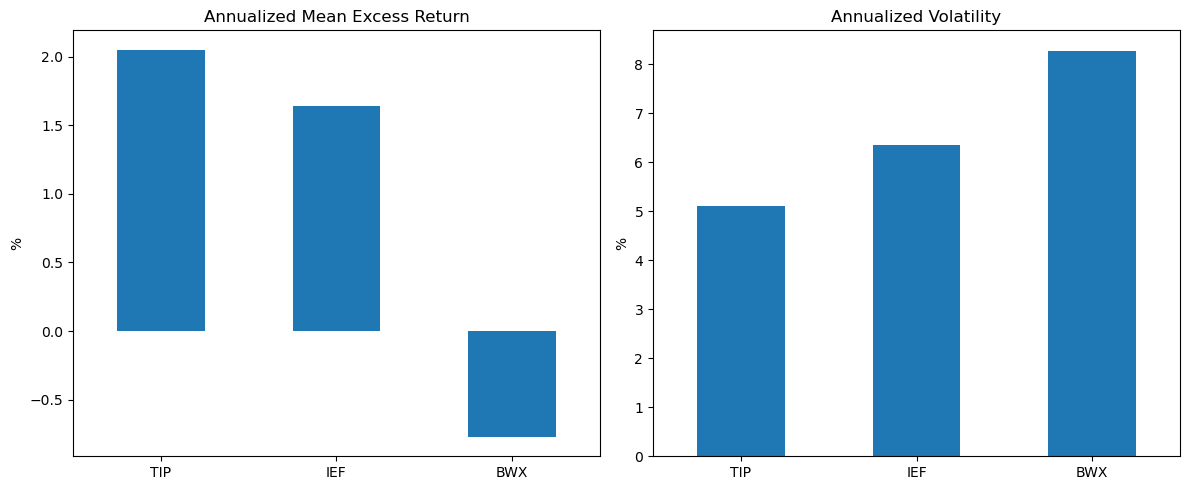

Cumulative returns at start:
                 TIP       IEF       BWX
Date                                    
2011-02-28  1.007618  0.998326  1.007027

Cumulative returns at end:
                 TIP       IEF       BWX
Date                                    
2025-05-31  1.316438  1.229164  0.852397


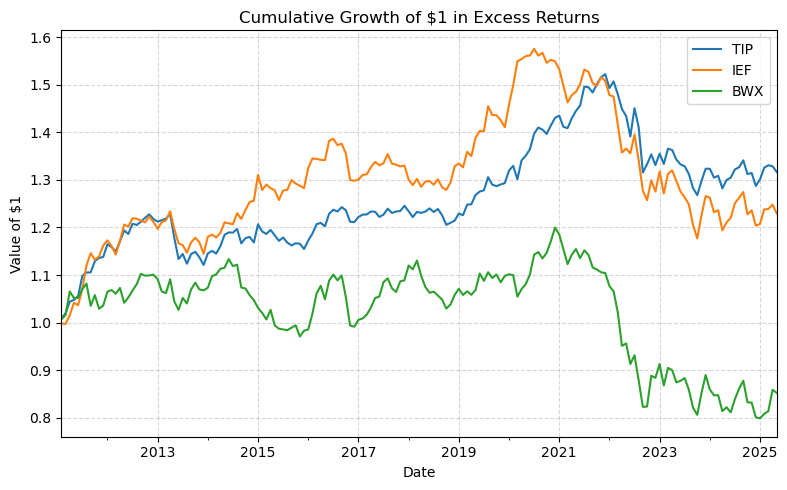

In [91]:
# 1) Pick out the three asset classes:
assets = ['TIP', 'IEF', 'BWX']
# print(excess_returns_pd)  
ex = excess_returns_pd[assets]

# 2) Annualize mean and volatility (We had calculated this as a dictionary above, but I redo it
# to have this data into a pandas df and I simplify calculations as well.)
annual_mean = ex.mean() * 12
annual_vol  = ex.std()  * np.sqrt(12)

# 3) Recall Sharpe Ratio = annual mean / annual volatility. 
sharpe = annual_mean / annual_vol

# 4) Pack into a summary DataFrame
summary = pd.DataFrame({
    'Ann. Mean (%)': (annual_mean * 100),
    'Ann. Vol  (%)': (annual_vol  * 100),
    'Sharpe'       : sharpe
})

print("\nPerformance summary:\n", summary)

# 5) Bar‐chart comparison of means & vols
fig, axes = plt.subplots(1, 2, figsize=(12,5))

summary['Ann. Mean (%)'].plot.bar(ax=axes[0], rot=0, title='Annualized Mean Excess Return')
axes[0].set_ylabel('%')

summary['Ann. Vol  (%)'].plot.bar(ax=axes[1], rot=0, title='Annualized Volatility')
axes[1].set_ylabel('%')

plt.tight_layout()
plt.show()


# 6) Cumulative growth of $1 in excess returns
# We add 1 to each excess return to multiply our capital + the returns. 
# Adding the returns successively for each month gives us cumulative growth
cum_ex = (1 + ex).cumprod()
print("Cumulative returns at start:")
print(cum_ex.head(1)[assets])

print("\nCumulative returns at end:")
print(cum_ex.tail(1)[assets])

cum_ex.plot(figsize=(8,5))
plt.title('Cumulative Growth of $1 in Excess Returns')
plt.ylabel('Value of $1')
plt.xlabel('Date')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

We can see from above that the TIPS asset class had the greatest Sharpe Ratio from the three asset classes. It had the greatest Annualized mean returns $(2.05\%)$ and lowest Annualized volatility $(5.11\%)$ amongst the three asset classes, which indicate very impressive results. We can also see that the cumulative growth of $\$1$ invested at the beginning of our timeframe ($02/28/2011$) produced the highest cumulative returns when it was invested in the TIPS class by the end of our time frame ($05/31/2025$). TIPS had a cumulative return of $\$1.31$, followed by Domestic Bonds (IEF) with $\$1.22$, and lastly by Foreign Bonds (BWX) with $\$0.85$

### 3. The MV frontier.
* Compute and display the weights of the tangency portfolios: $\wtan$.
* Does the ranking of weights align with the ranking of Sharpe ratios?
* Compute the mean, volatility, and Sharpe ratio for the tangency portfolio corresponding to
$\wtan$.

#### _Computing the Weights of Tangency Portfolios_ ####

From the Lecture, we saw the Mean variance solution $\omega^*$ (representing the optimal weights of assets) solves the optimization problem:
\begin{aligned}
\min_{\omega} ~\omega' \Sigma \omega \\
\text{s.t. } \omega' \mu = \mu^p \\
\omega'\mathbf{1} = 1 ~~
\end{aligned}
Since the objective function is convex in $\omega$, and the constraint is also convex, a portfolio $\omega*$ is MV iff there exists $\delta \in (-\infty, \infty)$ such that:

$\omega^* = \delta \omega^t + (1 - \delta) \omega^v$

where we have:

$\omega^t = \left( \frac{1}{\mathbf{1' \Sigma^{-1} \mu}}\right) \mathbf{\Sigma}^{-1}\mu$

and

$\omega^v = \left( \frac{1}{\mathbf{1' \Sigma^{-1} \mu}}\right) \mathbf{\Sigma}^{-1}\mathbf{1}$

In this case, I am assuming that the tangency portfolio contains all asset classes. In the next step, I will include a tangency portofolio only containing assets from TIPS, IEF (domestic bonds) and BWX (foreign bonds).

Tangency portfolio weights:
 BWX    -6.117430
DBC    -0.112341
EEM     0.853591
EFA     0.385285
HYG     2.634922
IEF     9.010591
IYR    -2.382146
PSP    -1.716842
QAI   -13.616007
SPY    10.729782
TIP     1.330595
dtype: float64

Comparing Tangency Weights with Sharpe Ratios:


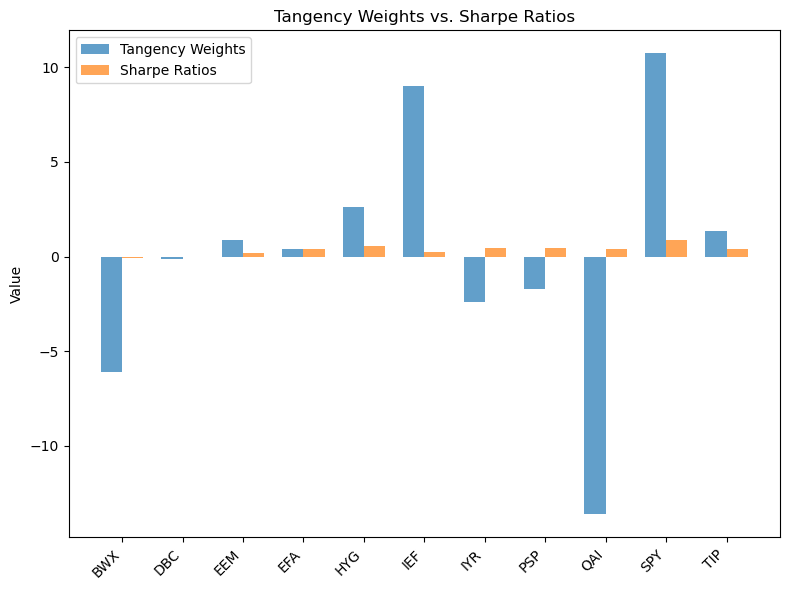

In [92]:
# We will calculate w^t using the fomula above: w^t = (1 / 1'Sigma^-1 mu) Sigma^-1 mu
# We need to calculate the covariance matrix of the excess returns and the mean excess returns. I will keep both as pandas data structures.
cov_matrix = excess_returns_pd.cov() * 12  # Annualize the covariance matrix
mean_excess_returns = excess_returns_pd.mean() * 12  # Annualize the mean returns

# Calculate the inverse of the covariance matrix
inv_cov_matrix = np.linalg.inv(cov_matrix)

# Calculate the numerator: Sigma^-1 mu
numerator = inv_cov_matrix @ mean_excess_returns

# Calculate the denominator: 1' Sigma^-1 mu
denominator = np.sum(numerator)

# Calculate the weights w^t
weights_original = numerator / denominator

# Put into a nice Series for display
w_tan_original_series = pd.Series(weights_original, index=mean_excess_returns.index)
print("Tangency portfolio weights:\n", w_tan_original_series)

# Comparing weights with the Sharpe ratios:

print("\nComparing Tangency Weights with Sharpe Ratios:")
# Recalculate the Sharpe ratios for the tangency portfolio (just in case we changed this variable in a previous cell):
sharpe_orig_ratios = excess_returns_pd.mean() * 12 / (excess_returns_pd.std() * np.sqrt(12))
labels_orig = list(w_tan_original_series.index)
n = len(labels_orig)
x = np.arange(n)           # the label locations
width = 0.35               # the width of the bars


# Turn sharpe_ratios into an aligned list in the same order as labels
sharpe_orig_vals = [sharpe_orig_ratios[a] for a in labels_orig]
fig_orig, ax_orig = plt.subplots(figsize=(8, 6))

# tangency weights shifted left by width/2
ax_orig.bar(x - width/2, w_tan_original_series.values, width,
       label='Tangency Weights', alpha=0.7)
# sharpe ratios shifted right by width/2
ax_orig.bar(x + width/2, sharpe_orig_vals, width,
       label='Sharpe Ratios', alpha=0.7)

# cosmetics
ax_orig.set_xticks(x)
ax_orig.set_xticklabels(labels_orig, rotation=45, ha='right')
ax_orig.set_ylabel('Value')
ax_orig.set_title('Tangency Weights vs. Sharpe Ratios')
ax_orig.legend()
plt.tight_layout()
plt.show()

#### _Annualized Mean Returns, Volatility and Sharpe Ratios for $\omega^t$ with 11 asset classes_ ####

In [93]:
# Print out returns, volatility, and Sharpe:
ret_tan   = w_tan_original_series.dot(mean_excess_returns)
vol_tan   = np.sqrt(w_tan_original_series.dot(cov_matrix).dot(w_tan_original_series))
sharpe_tan = ret_tan / vol_tan
print(f"\nTangency portfolio annual mean return = {ret_tan:.2%}")
print(f"Tangency portfolio annual volatility    = {vol_tan:.2%}")
print(f"Tangency portfolio Sharpe ratio      = {sharpe_tan:.2f}")


Tangency portfolio annual mean return = 115.51%
Tangency portfolio annual volatility    = 74.44%
Tangency portfolio Sharpe ratio      = 1.55


#### _Creating $\omega^t$ using only TIPS, IEF, and BWX:_ ####

Tangency portfolio weights:
 TIP    1.922005
IEF    0.017804
BWX   -0.939809
dtype: float64

Comparing Tangency Weights with Sharpe Ratios:


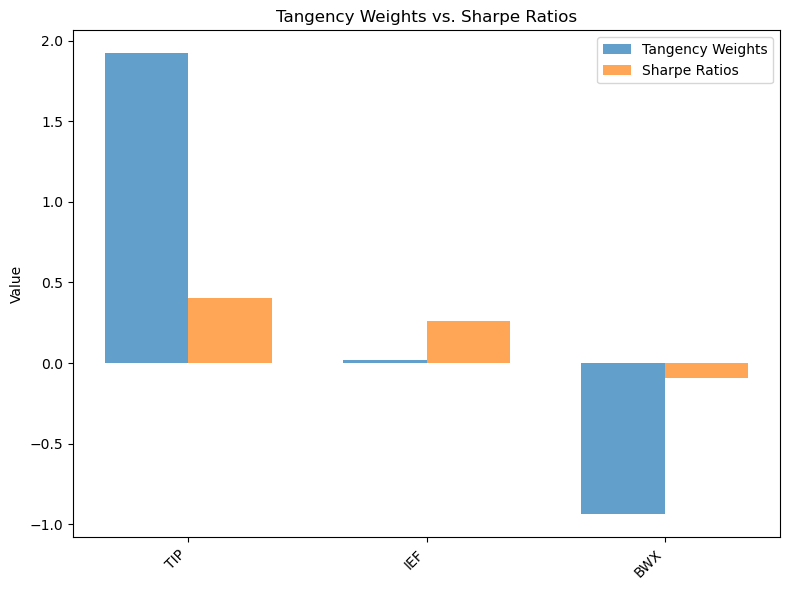

In [94]:
# Here, I am just replacing excess_returnds_pd with ex (which only cotains the three assets of interest)

# We will calculate w^t using the fomula above: w^t = (1 / 1'Sigma^-1 mu) Sigma^-1 mu
# We need to calculate the covariance matrix of the excess returns and the mean excess returns. I will keep both as pandas data structures.
cov_matrix_three = ex.cov() * 12  # Annualize the covariance matrix
mean_excess_returns_three = ex.mean() * 12  # Annualize the mean returns

# Calculate the inverse of the covariance matrix
inv_cov_matrix_three = np.linalg.inv(cov_matrix_three)

# Calculate the numerator: Sigma^-1 mu
numerator = inv_cov_matrix_three @ mean_excess_returns_three

# Calculate the denominator: 1' Sigma^-1 mu
denominator = np.sum(numerator)

# Calculate the weights w^t
weights_three = numerator / denominator

# Put into a nice Series for display
w_tan_three_series = pd.Series(weights_three, index=mean_excess_returns_three.index)
print("Tangency portfolio weights:\n", w_tan_three_series)

# Comparing weights with the Sharpe ratios:
print("\nComparing Tangency Weights with Sharpe Ratios:")
# Recalculate the Sharpe ratios for the tangency portfolio (just in case we changed this
# variable in a previous cell):
sharpe_ratios = ex.mean() * 12 / (ex.std() * np.sqrt(12))
labels = list(w_tan_three_series.index)
n = len(labels)
x = np.arange(n)           # the label locations
width = 0.35               # the width of the bars


# Turn sharpe_ratios into an aligned list in the same order as labels
sharpe_vals = [sharpe_orig_ratios[a] for a in labels]
fig, ax = plt.subplots(figsize=(8, 6))

# tangency weights shifted left by width/2
ax.bar(x - width/2, w_tan_three_series.values, width,
       label='Tangency Weights', alpha=0.7)
# sharpe ratios shifted right by width/2
ax.bar(x + width/2, sharpe_vals, width,
       label='Sharpe Ratios', alpha=0.7)

# cosmetics
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_ylabel('Value')
ax.set_title('Tangency Weights vs. Sharpe Ratios')
ax.legend()
plt.tight_layout()
plt.show()

#### _Annual Excess Mean Returns, Volatility, and Sharpe Ratio of $\omega^t$ portfolio with $3$ asset classes_ ####

In [95]:
# Print out returns, volatility, and Sharpe:
ret_tan   = w_tan_three_series.dot(mean_excess_returns_three)
vol_tan   = np.sqrt(w_tan_three_series.dot(cov_matrix_three).dot(w_tan_three_series))
sharpe_tan = ret_tan / vol_tan
print(f"\nTangency portfolio annual mean return = {ret_tan:.2%}")
print(f"Tangency portfolio annual volatility    = {vol_tan:.2%}")
print(f"Tangency portfolio Sharpe ratio      = {sharpe_tan:.2f}")


Tangency portfolio annual mean return = 4.69%
Tangency portfolio annual volatility    = 7.38%
Tangency portfolio Sharpe ratio      = 0.64


We can observe above that TIPS holds a positive weight in both the portfolio containing all $11$ asset classes and the portfolio only containing $3$ asset classes. In both cases, the model tells us to leverage TIPS to maximize the Sharpe ratio of our portfolio. For the portfolio only containing TIPS, IEF, and BWX, TIPS has a value of $1.92$ which is very significant. We then should have a small position in IEF (value of $0.01$) and big short position on BWX ($-0.94$).

To compare Sharpe ratios with weights, we use a bar graph. We see in this case and that they are positively correlated. If an asset has a higher Sharpe Ratio (such as the case for TIPS), it is generally given a larger weight in the tangency portfolio. However, the relationship is not one-to-one. That is, the tangency weight portfolio does not adjust the weights of assets based on just their Sharpe Ratios. It also adjusts their weight based on their covariances with the rest of the portfolio. For instance, PSP and IYR have positive Sharpe Ratios but negative weights in the tangency portfolio. This shows that the correlation is not strict.

For the tangency portfolio with $11$ asset classes, we have an expected annual return of $115\%$ and volatility of $74.44\%$ giving a Sharpe Ratio of $1.55$. For the tangency portfolio with $3$ asset classes, we have an annual mean return of $4.69\%$ with a volatility of $7.38\%$.

### 4. TIPS
Assess how much the tangency portfolio (and performance) change if...
* TIPS are dropped completely from the investment set.
* The expected excess return to TIPS is adjusted to be 0.0012 higher than what the historic sample shows.

Based on the analysis, do TIPS seem to expand the investment opportunity set, implying that Harvard should consider them as a separate asset?

#### _How much would the tangency portfolio and performance change if TIPS are dropped completly from the investment set?_ ####

Tangency portfolio weights with TIPS removed:
 BWX    -8.320309
DBC    -0.048440
EEM     1.215107
EFA     0.415306
HYG     3.744656
IEF    13.355289
IYR    -3.167946
PSP    -2.284411
QAI   -18.571185
SPY    14.661934
dtype: float64


Original Tangency Weights:
 BWX    -6.117430
DBC    -0.112341
EEM     0.853591
EFA     0.385285
HYG     2.634922
IEF     9.010591
IYR    -2.382146
PSP    -1.716842
QAI   -13.616007
SPY    10.729782
TIP     1.330595
dtype: float64

Tangency Weights (TIPS removed) with Sharpe Ratios:


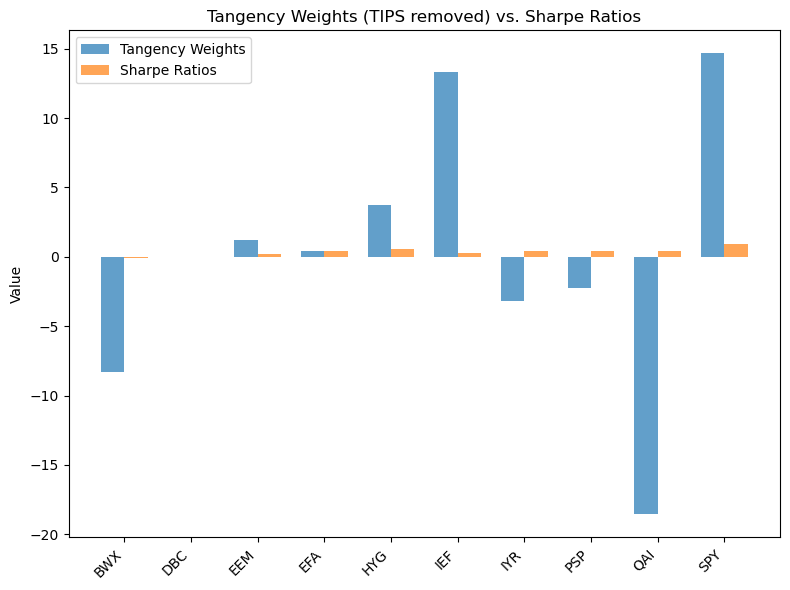


 Tangency Weights with Sharpe Ratios for 11 assets:


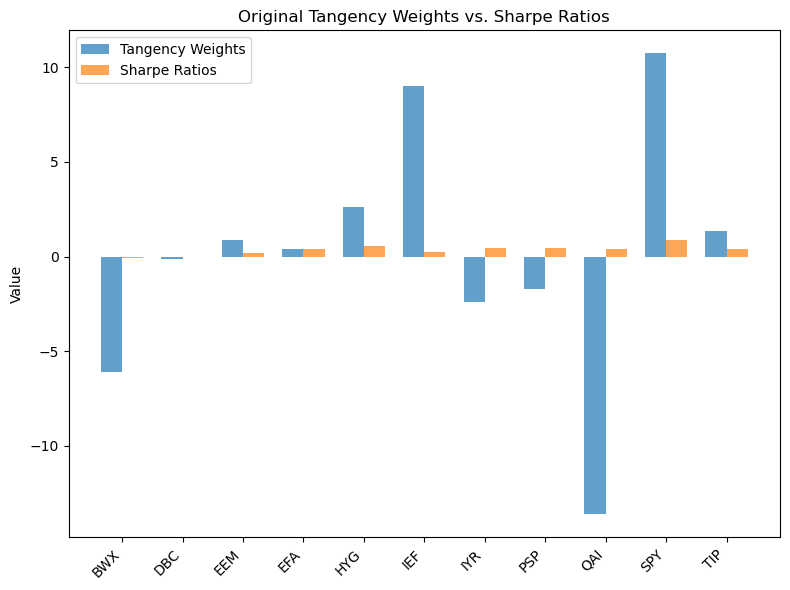

In [96]:
# Recalculate the weights for the tangency portfolio using only 10 assets (TIPS removed):
excess_returns_pd_no_tips = excess_returns_pd.drop(columns=['TIP'])
cov_matrix = excess_returns_pd_no_tips.cov() * 12  # Annualize the covariance matrix
mean_excess_returns = excess_returns_pd_no_tips.mean() * 12  # Annualize the mean returns

# Calculate the inverse of the covariance matrix
inv_cov_matrix_no_tips = np.linalg.inv(cov_matrix)

# Calculate the numerator: Sigma^-1 mu
numerator = inv_cov_matrix_no_tips @ mean_excess_returns

# Calculate the denominator: 1' Sigma^-1 mu
denominator = np.sum(numerator)

# Calculate the weights w^t
weights_updated = numerator / denominator

# Put into a nice Series for display
w_tan_updated_series = pd.Series(weights_updated, index=mean_excess_returns.index)
print("Tangency portfolio weights with TIPS removed:\n", w_tan_updated_series)
print("\n")
print("Original Tangency Weights:\n", w_tan_original_series)

print("\nTangency Weights (TIPS removed) with Sharpe Ratios:")
# Recalculate the Sharpe ratios for the tangency portfolio (just in case we changed this variable in a previous cell):
sharpe_ratios = excess_returns_pd_no_tips.mean() * 12 / (excess_returns_pd_no_tips.std() * np.sqrt(12))
labels = list(w_tan_updated_series.index)
n = len(labels)
x = np.arange(n)           # the label locations
width = 0.35               # the width of the bars


# Turn sharpe_ratios into an aligned list in the same order as labels
sharpe_vals = [sharpe_ratios[a] for a in labels]
fig, ax = plt.subplots(figsize=(8, 6))

# tangency weights shifted left by width/2
ax.bar(x - width/2, w_tan_updated_series.values, width,
       label='Tangency Weights', alpha=0.7)
# sharpe ratios shifted right by width/2
ax.bar(x + width/2, sharpe_vals, width,
       label='Sharpe Ratios', alpha=0.7)

# cosmetics
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_ylabel('Value')
ax.set_title('Tangency Weights (TIPS removed) vs. Sharpe Ratios')
ax.legend()
plt.tight_layout()
plt.show()

print("\n Tangency Weights with Sharpe Ratios for 11 assets:")
# Recalculate the Sharpe ratios for the tangency portfolio (just in case we changed this variable in a previous cell):
sharpe_orig_ratios = excess_returns_pd.mean() * 12 / (excess_returns_pd.std() * np.sqrt(12))
labels_orig = list(w_tan_original_series.index)
n = len(labels_orig)
x = np.arange(n)           # the label locations
width = 0.35               # the width of the bars


# Turn sharpe_ratios into an aligned list in the same order as labels
sharpe_orig_vals = [sharpe_orig_ratios[a] for a in labels_orig]
fig_orig, ax_orig = plt.subplots(figsize=(8, 6))

# tangency weights shifted left by width/2
ax_orig.bar(x - width/2, w_tan_original_series.values, width,
       label='Tangency Weights', alpha=0.7)
# sharpe ratios shifted right by width/2
ax_orig.bar(x + width/2, sharpe_orig_vals, width,
       label='Sharpe Ratios', alpha=0.7)

# cosmetics
ax_orig.set_xticks(x)
ax_orig.set_xticklabels(labels_orig, rotation=45, ha='right')
ax_orig.set_ylabel('Value')
ax_orig.set_title('Original Tangency Weights vs. Sharpe Ratios')
ax_orig.legend()
plt.tight_layout()
plt.show()

#### _Annualized Mean Returns, Volatiliy, and Sharpe Ratio for $\omega^t$ with TIPS removed:_ ####

In [97]:
# Print out returns, volatility, and Sharpe:
ret_tan_updated   = w_tan_updated_series.dot(mean_excess_returns)
vol_tan_updated   = np.sqrt(w_tan_updated_series.dot(cov_matrix).dot(w_tan_updated_series))
sharpe_tan_updated = ret_tan_updated / vol_tan_updated
print(f"\nTangency portfolio annual mean return = {ret_tan_updated:.2%}")
print(f"Tangency portfolio annual volatility    = {vol_tan_updated:.2%}")
print(f"Tangency portfolio Sharpe ratio      = {sharpe_tan_updated:.2f}")


Tangency portfolio annual mean return = 157.09%
Tangency portfolio annual volatility    = 101.33%
Tangency portfolio Sharpe ratio      = 1.55


In the original Tangency portfolio containing $11$ classes, we calculated an annual mean return of $115.51\%$ and a volatility of $74.44\%$ giving a Sharpe Ratio of $1.55$. For the new Tangency Portfolio containing only $10$ classes with TIPS removed, we calculated an annual mean return of $157.09\%$  and an annual volatility of $101.33\%$ giving the same Sharpe ratio value of $1.55$, surprisingly. This shows that the portfolio containing TIPS has lower mean returms and significantly lower volatility. But, from a risk-adjusted perspective, both portfolios are equivalently risky. This leads to believe that removing TIPS does not decrease risk. 

The allocation of weights was very consistent with our original tangency portfolio. After removing TIPS, SPY becomes even more leveraged than before (a jump from $10.72$ to $14.66$), QAI is more shorted as well ($-13.61$ to $-18.57$). This shows signs that highly leveraged and highly shorted assets in our original portfolio are given more weight in the same direction in the new portfolio. This makes sense since the covariance between assets is still very similar after removing TIPS. Small assets in our original portfolio are still small in our new portfolio and they fluctuate a little in either positive or negative directions. It is important to see that the order of weights of assets does not change between the original and new portfolios, which further proves the point that the covariances between assets are still similar even with TIPS removed. 

Overall, we can see that the tangency portfolio is significantly less risky when the asset class TIPS is included, while at the same time achieving the same Sharpe Ratio as the tangency portfolio with TIPS removed. This gives us strong evidence to consider including TIPS in our modified portfolio. 

### _How much would the Tangency Portfolio and performance change if the expected excess return to TIPS is adjusted to be 0.0012 points higher than what the historic sample shows?_ ####

Tangency portfolio weights with TIPS and updated mean:
 BWX    -5.113297
DBC    -0.141469
EEM     0.688802
EFA     0.371601
HYG     2.129074
IEF     7.030157
IYR    -2.023956
PSP    -1.458128
QAI   -11.357299
SPY     8.937398
TIP     1.937118
dtype: float64

Original Tangency weights
 BWX    -6.117430
DBC    -0.112341
EEM     0.853591
EFA     0.385285
HYG     2.634922
IEF     9.010591
IYR    -2.382146
PSP    -1.716842
QAI   -13.616007
SPY    10.729782
TIP     1.330595
dtype: float64

Comparing Tangency Weights with Sharpe Ratios:


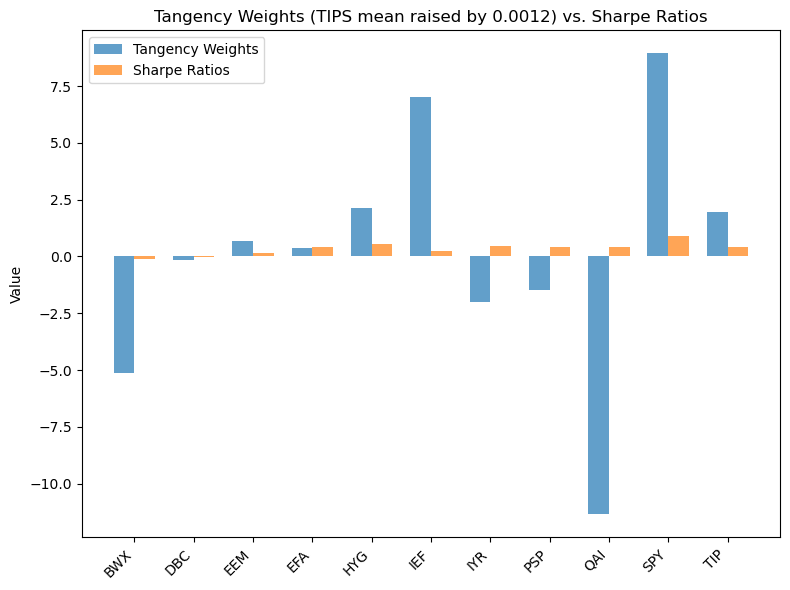


Tangency portfolio annual mean return = 96.56%
Tangency portfolio annual volatility    = 62.26%
Tangency portfolio Sharpe ratio      = 1.55


In [98]:
# Obtain the excess returns df with TIPS included:
# excess_returns_pd
cov_matrix = excess_returns_pd.cov() * 12  # Annualize the covariance matrix
mean_excess_returns = excess_returns_pd.mean() * 12  # Annualize the mean returns

new_mean_excess_returns = mean_excess_returns.copy()
new_mean_excess_returns['TIP'] = new_mean_excess_returns['TIP'] + 0.0012  # Add 0.0012 to the mean excess return of TIPS

# Calculate the inverse of the covariance matrix
inv_cov_matrix_mean_updated = np.linalg.inv(cov_matrix)

# Calculate the numerator: Sigma^-1 mu
numerator = inv_cov_matrix_mean_updated @ new_mean_excess_returns

# Calculate the denominator: 1' Sigma^-1 mu
denominator = np.sum(numerator)

# Calculate the weights w^t
weights_updated = numerator / denominator

# Put into a nice Series for display
w_tan_updated_newmean_series = pd.Series(weights_updated, index=new_mean_excess_returns.index)
print("Tangency portfolio weights with TIPS and updated mean:\n", w_tan_updated_newmean_series)
print("\nOriginal Tangency weights\n", w_tan_original_series)

# Comparing weights with the Sharpe ratios:
print("\nComparing Tangency Weights with Sharpe Ratios:")
# Recalculate the Sharpe ratios for the tangency portfolio (just in case we changed this
# variable in a previous cell):
sharpe_ratios = excess_returns_pd.mean() * 12 / (excess_returns_pd.std() * np.sqrt(12))
labels = list(w_tan_updated_newmean_series.index)
n = len(labels)
x = np.arange(n)           # the label locations
width = 0.35               # the width of the bars
# Turn sharpe_ratios into an aligned list in the same order as labels
sharpe_vals = [sharpe_ratios[a] for a in labels]
fig, ax = plt.subplots(figsize=(8, 6))

# tangency weights shifted left by width/2
ax.bar(x - width/2, w_tan_updated_newmean_series.values, width,
       label='Tangency Weights', alpha=0.7)
# sharpe ratios shifted right by width/2
ax.bar(x + width/2, sharpe_vals, width,
       label='Sharpe Ratios', alpha=0.7)

# cosmetics
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_ylabel('Value')
ax.set_title('Tangency Weights (TIPS mean raised by 0.0012) vs. Sharpe Ratios')
ax.legend()
plt.tight_layout()
plt.show()

# Print out returns, volatility, and Sharpe:
ret_tan_updated_newmean   = w_tan_updated_newmean_series.dot(mean_excess_returns)
vol_tan_updated_newmean   = np.sqrt(w_tan_updated_newmean_series.dot(cov_matrix).dot(w_tan_updated_newmean_series))
sharpe_tan_updated_newmean = ret_tan_updated_newmean / vol_tan_updated_newmean
print(f"\nTangency portfolio annual mean return = {ret_tan_updated_newmean:.2%}")
print(f"Tangency portfolio annual volatility    = {vol_tan_updated_newmean:.2%}")
print(f"Tangency portfolio Sharpe ratio      = {sharpe_tan_updated_newmean:.2f}")

Improving the expected excess return of the TIPS asset class by $0.12\%$ has an important effect on the tangency portfolio. First, we can observe that the allocated weight to the TIPS asset increases from $1.33$ to $1.93$. This is evident since the Sharpe ratio of TIPS increased with this change, and we saw that weights are positively correlated to Sharpe Ratios. The covariance between asset types does not change, so we keep the same order of allocation weights. There is less leverage on SPY and less shortage on QAI to compensate for an increase in weight of the TIPS class. There are other smaller changes to asset allocations accordingly. 

The performance metrics show an annual mean return of $96.56\%$ and annual volatility of $62.26\%$ compared with a mean return of $115.51\%$ and a volatility of $74.44\%$ in our original portfolio. Importantly, the Sharpe Ratio of the tangency portfolio remains at $1.55$ which shows that this portfolio is equally risky as the original one. However, this new portfolio has less absolute risk which makes it an attractive tool to an endowment fund such as Harvard.

We saw that removing TIPS from the portfolio does not change its relative risk (Sharpe ratio stays unchanged), and we also saw that increasing mean returns by $0.12\%$ for TIPS leads to an overall lower absolute risk for the tangency portfolio. Furthermore, we saw that this asset class leads to a cumulative growth of capital greater than the return obtained from the market of domestic bonds (IEF) or foreign bonds (BWX), as we found out above. Thus, we believe that this asset class to should be added to Harvard's endowment.

# 3. Allocations

<i>This section is graded for a good-faith effort by your group. Submit your write-up- along with your supporting code.

* Continue with the same data file as the previous section.

* Suppose the investor has a targeted mean excess return (per month) of $\mutarg$ = 0.01.

Build the following portfolios:

#### Equally-weighted (EW)
Rescale the entire weighting vector to have target mean $\mutarg$. Thus, the $i$ element of the weight vector is,
$$\wEW_i = \frac{1}{n}$$

#### “Risk-parity” (RP)
Risk-parity is a term used in a variety of ways, but here we have in mind setting the weight of the portfolio to be proportional to the inverse of its full-sample variance estimate. Thus, the $i$ element of the weight vector is,
$$\wRP_i = \frac{1}{\sigma_i^2}$$

#### Mean-Variance (MV)
As described in `Section 2`.


### Comparing

In order to compare all these allocation methods, rescale each weight vector, such that it has targeted mean return of $\mutarg$.

* Calculate the performance of each of these portfolios over the sample.
* Report their mean, volatility, and Sharpe ratio. 
* How does performance compare across allocation methods?

***

# 4. EXTRA: Out-of-Sample Performance

<i>This section is not graded, and you do not need to submit it. Still, we may discuss it in class, in which case, you would be expected to know it.

### 1. One-step Out-of-Sample (OOS) Performance
Let’s divide the sample to both compute a portfolio and then check its performance out of sample.
* Using only data through the end of `2022`, compute the weights built in Section 3.
* Rescale the weights, (using just the in-sample data,) to set each allocation to have the same mean return of $\mutarg$.
* Using those weights, calculate the portfolio’s Sharpe ratio within that sample.
* Again using those weights, (derived using data through `2022`,) calculate the portfolio’s OOS Sharpe ratio, which is based only on performance in `2023-2024`.

### 2. Rolling OOS Performance

Iterate the Out-of-Sample performance every year, not just the final year. Namely,
* Start at the end of `2015`, and calculate the weights through that time. Rescale them using the mean returns through that time.
* Apply the weights to the returns in the upcoming year, (`2016`.)
* Step forward a year in time, and recompute.
* Continue until again calculating the weights through `2023` and applying them to the returns in `2024`.

Report the mean, volatility, and Sharpe from this dynamic approach for the following portfolios:
* mean-variance (tangency)
* equally-weighted
* risk-parity
* regularized

***

# 5. EXTRA: Without a Riskless Asset

<i>This section is not graded, and you do not need to submit it. Still, we may discuss it in class, in which case, you would be expected to know it.

Re-do Section 2 above, but in the model without a risk-free rate.

That is, build the MV allocation using the two-part formula in the `Mean-Variance` section of the notes.
* This essentially substitutes the risk-free rate with the minimum-variance portfolio.
* Now, the allocation depends nonlinearly on the target mean return, $\mutarg$. (With a risk-free rate, we simply scale the weights up and down to achieve the mean return.)

You will find that, conceptually, the answers are very similar. 

***

# 6. EXTRA: Bayesian Allocation

Try the following allocation among the choices in `Section 3`...


#### Regularized (REG)
Much like the Mean-Variance portfolio, set the weights proportional to 
$$\wREG \sim \widehat{\Sigma}^{-1}\mux$$
but this time, use a regularized covariance matrix,
$$\widehat{\Sigma} = \frac{\Sigma + \Sigma_D}{2}$$
where $\Sigma_D$ denotes a *diagonal* matrix of the security variances, with zeros in the off-diagonals.

Thus, $\widehat{\Sigma}$ is obtained from the usual covariance matrix, $\Sigma$, but shrinking all the covariances to half their estimated values. 
